<a href="https://colab.research.google.com/github/AnaFerreira015/AnaFerreira015/blob/master/lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Implemente uma função que receba uma imagem em formato PPM,
o tamanho ***n*** de um filtro espacial com dimensões ***n × n*** e a matriz com os pesos do filtro, e aplique o filtro com uma convolução, gerando e salvando a imagem resultante no disco em formato PPM. Você não pode usar a OpenCV em nenhum desses passos. As especificações do formato PPM podem ser encontradas aqui: https://netpbm.sourceforge.net/doc/ppm.html

In [33]:
import numpy as np
from PIL import Image
from google.colab import files
from IPython.display import display

In [34]:
uploaded = files.upload()

Saving paisagem.jpeg to paisagem.jpeg


In [35]:
jpeg_image = Image.open('paisagem.jpeg')

jpeg_image = jpeg_image.convert('RGB')

In [36]:
def save_as_ppm_p3(image, filename):
    """Salva a imagem PIL no formato PPM P3 (texto)."""
    width, height = image.size
    pixels = np.array(image)

    with open(filename, 'w') as f:
        f.write('P3\n')
        f.write(f'{width} {height}\n')
        f.write('255\n')
        for y in range(height):
            for x in range(width):
                r, g, b = pixels[y, x]
                f.write(f'{r} {g} {b}\n')

save_as_ppm_p3(jpeg_image, 'paisagem_result.ppm')
print("Imagem convertida para PPM (P3) com sucesso!")

Imagem convertida para PPM (P3) com sucesso!


In [37]:
def read_ppm(filename):
    """Lê uma imagem PPM (formato P3) e retorna uma matriz numpy."""
    with open(filename, 'r') as f:
        assert f.readline().strip() == 'P3'  # Verifica o formato P3
        dimensions_line = f.readline().strip()
        while dimensions_line.startswith('#'):
            dimensions_line = f.readline().strip()
        width, height = map(int, dimensions_line.split())
        max_value = int(f.readline().strip())

        pixels = list(map(int, f.read().split()))
        image = np.array(pixels).reshape((height, width, 3))
    return image, width, height, max_value

In [39]:
def save_ppm(filename, image, width, height, max_value):
    """Salva uma matriz numpy como uma imagem PPM (formato P3)."""
    with open(filename, 'w') as f:
        f.write('P3\n')
        f.write(f'{width} {height}\n')
        f.write(f'{max_value}\n')
        for row in image:
            for pixel in row:
                f.write(f'{pixel[0]} {pixel[1]} {pixel[2]}\n')

In [40]:
def apply_convolution(image, filter_matrix):
    """Aplica a convolução na imagem com o filtro fornecido."""
    height, width, _ = image.shape
    n = filter_matrix.shape[0]
    pad = n // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=0)

    output = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            for c in range(3):  # Para cada canal de cor (R, G, B)
                region = padded_image[i:i+n, j:j+n, c]
                value = np.sum(region * filter_matrix)
                output[i, j, c] = np.clip(value, 0, 255)
    return output

In [41]:
def main(input_filename, output_filename, filter_matrix):
    image, width, height, max_value = read_ppm(input_filename)
    filtered_image = apply_convolution(image, filter_matrix)
    save_ppm(output_filename, filtered_image, width, height, max_value)

In [42]:
# Exemplo de uso
if __name__ == "__main__":
    # Definindo um filtro de suavização 3x3
    filter_matrix = np.array([
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9]
    ])

    input_filename = 'paisagem_result.ppm'  # Caminho para a imagem PPM de entrada
    output_filename = 'imagem_filtrada.ppm'  # Caminho para a imagem PPM de saída

    main(input_filename, output_filename, filter_matrix)
    print(f"Imagem filtrada salva como {output_filename}.")

Imagem filtrada salva como imagem_filtrada.ppm.


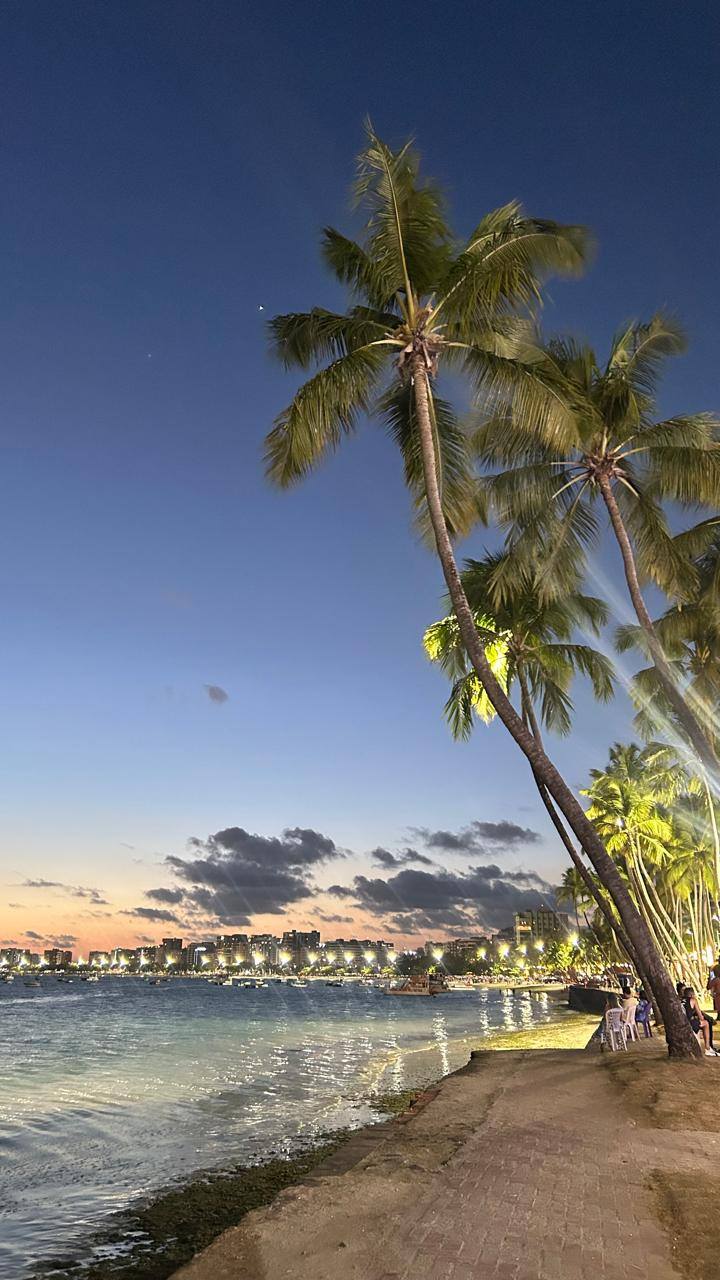

In [46]:
# Abrir e exibir a imagem sem filtro
original_image = Image.open(input_filename)
display(original_image)

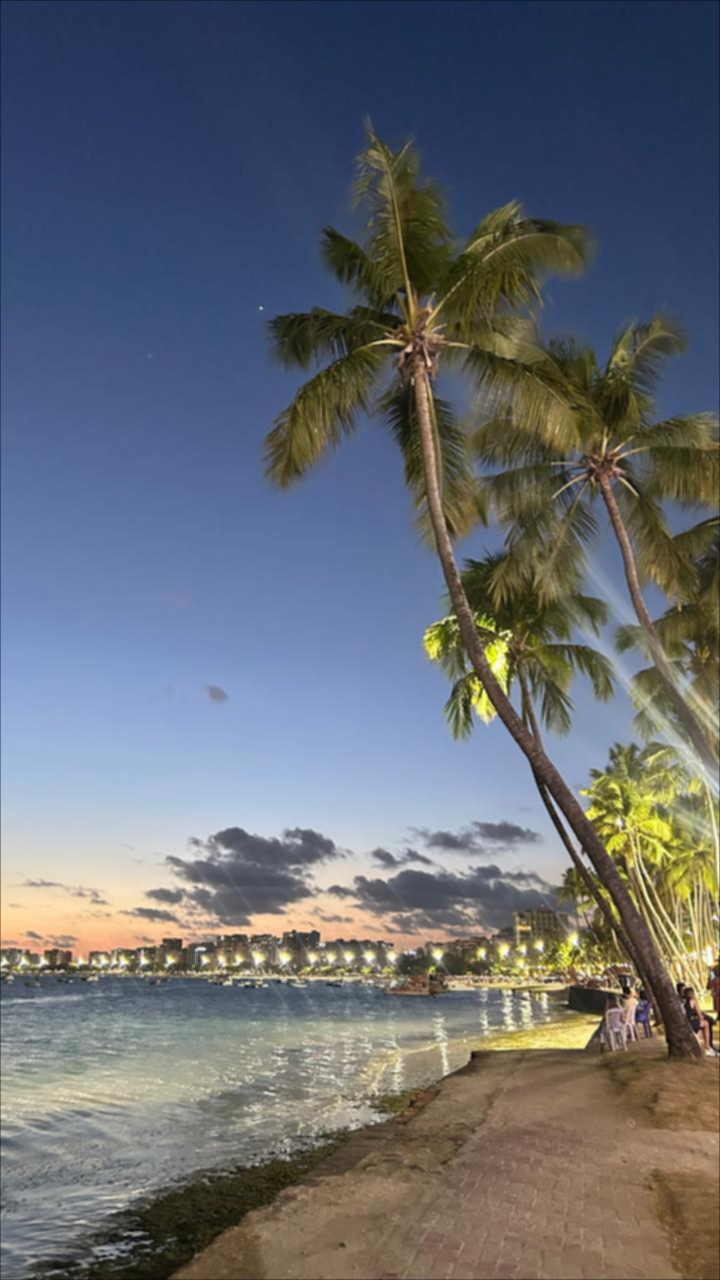

In [47]:
# Abrir e exibir a imagem filtrada
filtered_image = Image.open(output_filename)
display(filtered_image)
